In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geoscripts import gchemplots as gp

/home/dyvasey/miniforge3/envs/dev-geoscripts-gchem/lib/python3.11/site-packages/mpltern/ternary/datasets.py:9: UserWarning: `mpltern.ternary.datasets.py` has been moved to `mpltern.datasets.py` and will be removed from the present directory in mpltern 0.6.0.
  warnings.warn(msg)
2024-03-01 17:46:48,107 pyrolite.util.plot.helpers - WARNING: scikit-learn not installed


In [2]:
# Read in organized data
data = pd.read_csv('processed/data.csv',index_col=0)

data_filtered = data.loc[['G22019','G22020']]

print(data_filtered.index)

Index(['G22019', 'G22020'], dtype='object')


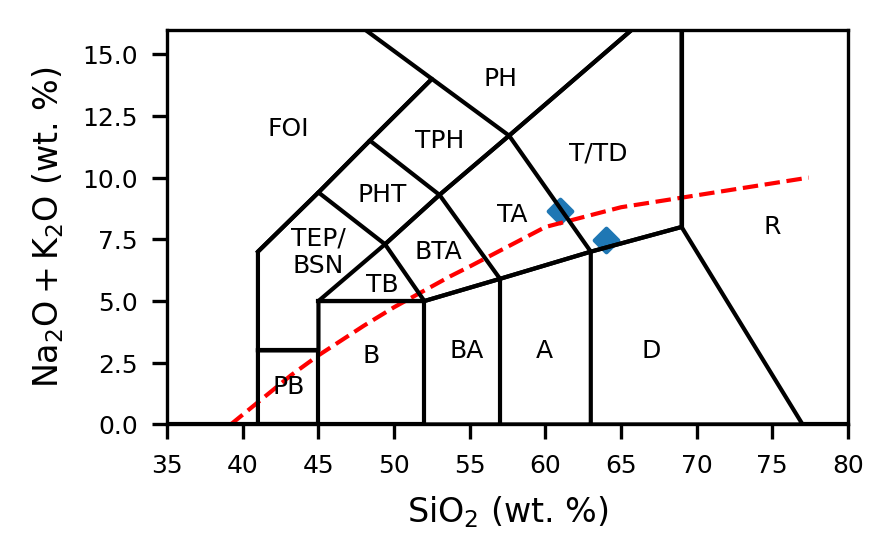

In [3]:
# TAS
fig,ax = plt.subplots(1,dpi=300,figsize=(3,2))

SiO2,Na2O,K2O = data_filtered[['SiO2','Na2O','K2O']].T.values
gp.TASsm(SiO2,Na2O,K2O,ax=ax,first=[])

plt.tight_layout()
fig.savefig('gtoid_TAS.pdf')

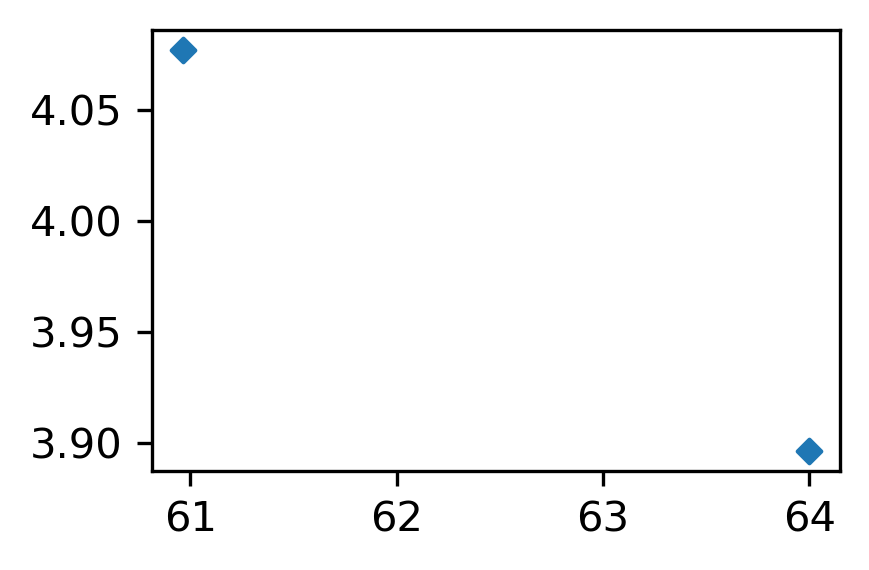

In [4]:
# K2O
fig,ax = plt.subplots(1,dpi=300,figsize=(3,2))

ax.scatter(SiO2,K2O)

plt.tight_layout()
fig.savefig('gtoid_K20.pdf')

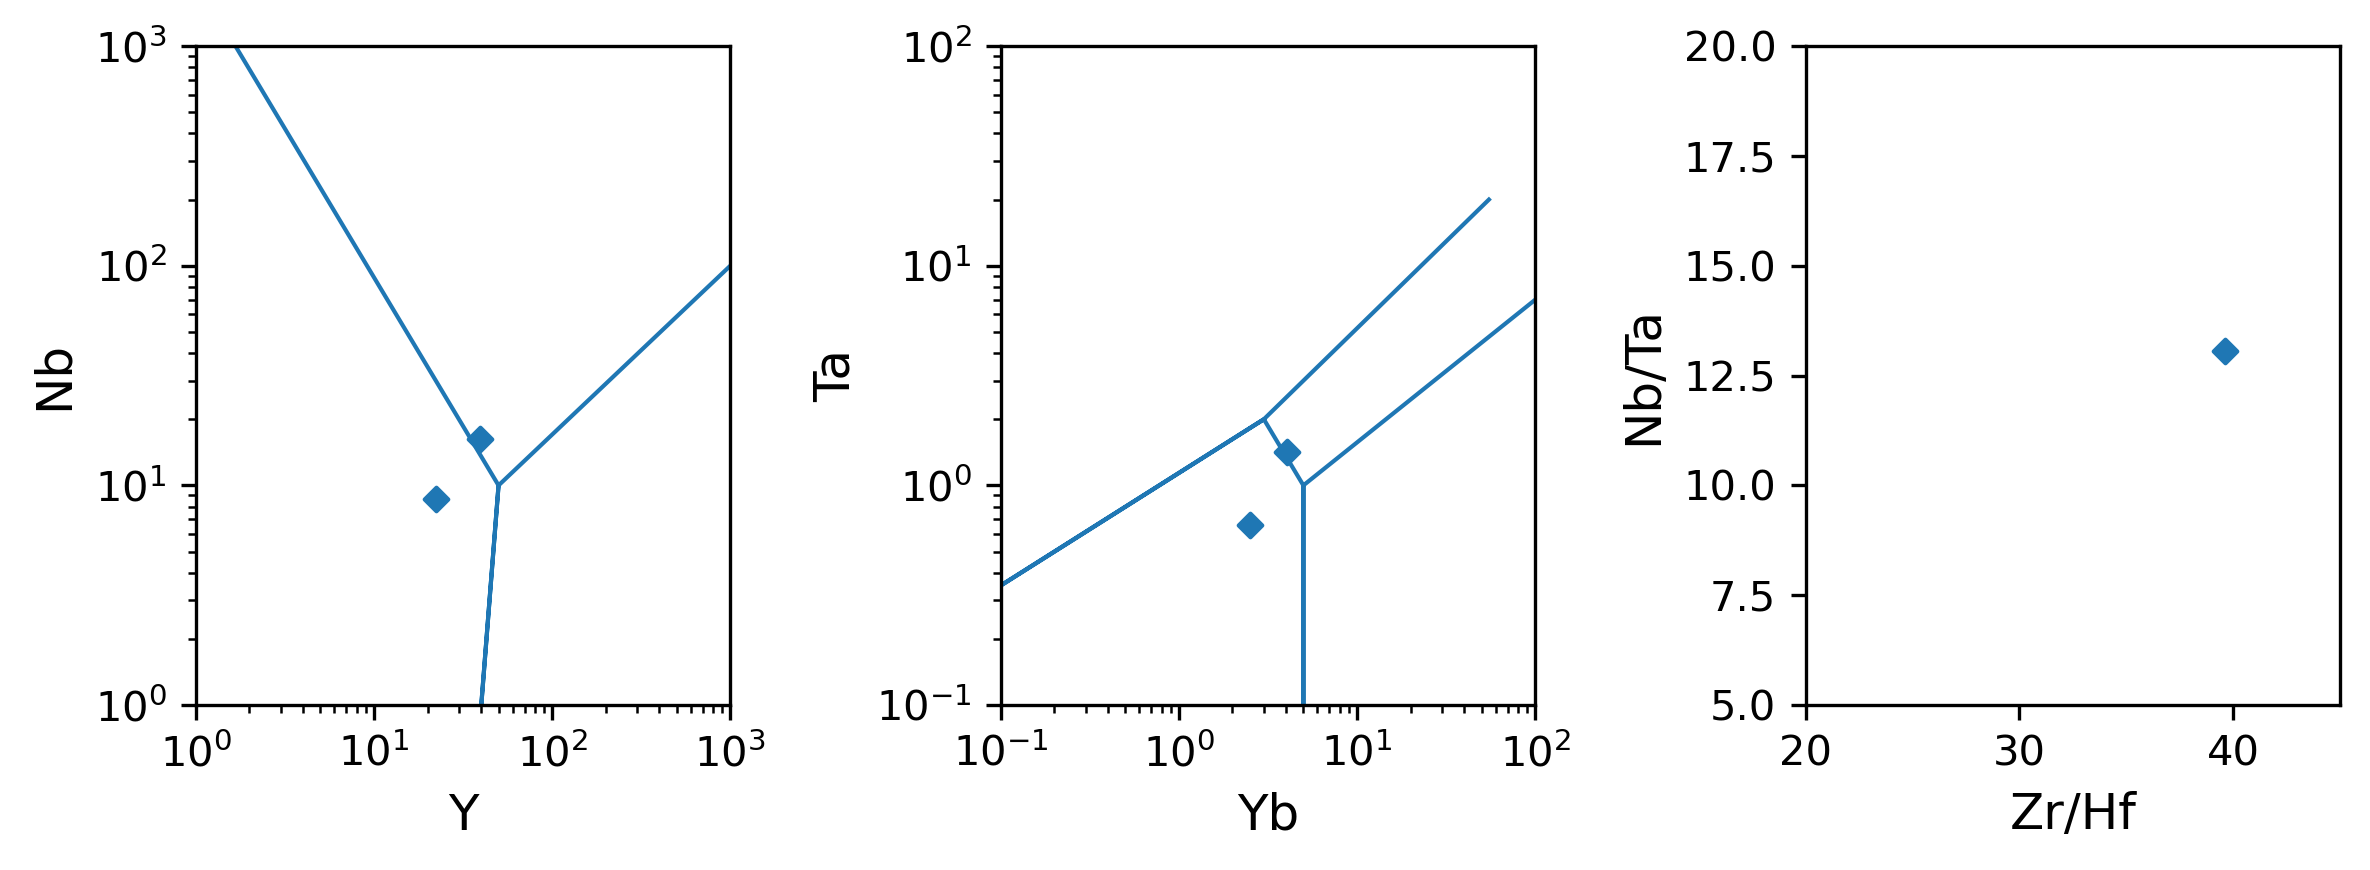

In [5]:
# Rb and other bivariate
fig,axs = plt.subplots(1,3,dpi=300,figsize=(8,3))

# Lines for discrimination
x1 = [1,50,40,50,1000]
y1 = [2000,10,1,10,100]

x2 = [55,3,0.1,3,5,5,5,100]
y2 = [20,2,0.35,2,1,0.05,1,7]


Nb,Y,Ta,Yb,Zr,Hf = data_filtered[['Nb','Y','Ta','Yb','Zr','Hf']].T.values
axs[0].scatter(Y,Nb)
axs[0].loglog()
axs[0].set_xlim(1,1000)
axs[0].set_ylim(1,1000)
axs[0].set_xlabel('Y')
axs[0].set_ylabel('Nb')
axs[0].plot(x1,y1)

axs[1].scatter(Yb,Ta)
axs[1].loglog()
axs[1].set_xlim(0.1,100)
axs[1].set_ylim(0.1,100)
axs[1].set_xlabel('Yb')
axs[1].set_ylabel('Ta')
axs[1].plot(x2,y2)

axs[2].scatter(Zr/Hf,Nb/Ta)
axs[2].set_xlim(20,45)
axs[2].set_ylim(5,20)
axs[2].set_xlabel('Zr/Hf')
axs[2].set_ylabel('Nb/Ta')

plt.tight_layout()
